Grouping and aggregation are essential in data science because they enable meaningful analysis and insights from complex and large-scale datasets. Here are key reasons why they are important:

* **Data Summarization:** Grouping allows you to condense large amounts of data into concise summaries. Aggregation provides statistical summaries (e.g., mean, sum, count), making it easier to understand data trends and characteristics without needing to examine every detail.
* **Insights Across Categories:** Grouping by categories, like regions, demographics, or time periods, lets you analyze patterns within each group. For example, aggregating sales data by region can reveal which areas are performing better, or grouping customer data by age group can highlight consumer trends.
* **Time Series Analysis:** In time-series data, grouping by time intervals (e.g., day, month, quarter) allows you to observe trends over time, which can be crucial for forecasting, seasonal analysis, and trend detection.
* **Reducing Data Complexity:** By summarizing data at a higher level, you reduce complexity, making it easier to visualize and interpret, especially in large datasets where working with raw data could be overwhelming.

In this chapter, we are going to see grouping and aggregating using pandas. Grouping and aggregating will help to achieve data analysis easily using various functions. These methods will help us to the group and summarize our data and make complex analysis comparatively easy.  

Througout this chapter, we will use *gdp_lifeExpectancy.csv*, let's read the csv file to pandas dataframe first

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Load the data
gdp_lifeExp_data = pd.read_csv('./Datasets/gdp_lifeExpectancy.csv')
gdp_lifeExp_data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## Grouping by a single column

`groupby()` allows you to split a DataFrame based on the values in one or more columns. First, we’ll explore grouping by a single column.

### Syntax of `groupby()`

* `DataFrame.groupby(by="column_name")` – Groups data by the specified column.

Consider the life expectancy dataset. suppose we want to group by the observations by `continent` by passing it as an argument to the `groupby()` method.

In [4]:
#Creating a GroupBy object
grouped = gdp_lifeExp_data.groupby('continent')
#This will split the data into groups that correspond to values of the column 'continent'

The `groupby()` method returns a GroupBy object.

In [5]:
#A 'GroupBy' objects is created with the `groupby()` function
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

The GroupBy object `grouped` contains the information of the groups in which the data is distributed. Each observation has been assigned to a specific group of the column(s) used to group the data. However, note that the dataset is not physically split into different DataFrames.  For example, in the above case, each observation is assigned to a particular group depending on the value of the `continent` for that observation. However, all the observations are still in the same DataFrame `data`.

### Attributes and methods of the [*GroupBy*](https://pandas.pydata.org/docs/reference/groupby.html) object

#### `keys`

The object(s) grouping the data are called *key(s)*. Here `continent` is the group key. The keys of the *GroupBy* object can be seen using Its `keys` attribute.

In [6]:
#Key(s) of the GroupBy object
grouped.keys

'continent'

#### [`ngroups`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.ngroup.html)
The number of groups in which the data is distributed based on the keys can be seen with the `ngroups` attribute.

In [7]:
#The number of groups based on the key(s)
grouped.ngroups

5

The group names are the *keys* of the dictionary, while the row labels are the corresponding *values*

In [8]:
#Group names
grouped.groups.keys()

dict_keys(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'])

#### [`groups`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.groups.html)
The `groups` attribute of the *GroupBy* object contains the group labels (or names) and the row labels of the observations in each group, as a dictionary.

In [9]:
#The groups (in the dictionary format)
grouped.groups

{'Africa': [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, ...], 'Americas': [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 432, 433, 434, 435, ...],

#### `groups.values`
The `groups.values` attribute of the *GroupBy* object contains the row labels of the observations in each group, as a dictionary.

In [10]:
#Group values are the row labels corresponding to a particular group
grouped.groups.values()

dict_values([Index([  24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
       ...
       1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703],
      dtype='int64', length=624), Index([  48,   49,   50,   51,   52,   53,   54,   55,   56,   57,
       ...
       1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643],
      dtype='int64', length=300), Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679],
      dtype='int64', length=396), Index([  12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
       ...
       1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607],
      dtype='int64', length=360), Index([  60,   61,   62,   63,   64,   65,   66,   67,   68,   69,   70,   71,
       1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103],
      dtype='int64')])

#### [`size()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.size.html)
The `size()` method of the *GroupBy* object returns the number of observations in each group.

In [11]:
#Number of observations in each group
grouped.size()

continent
Africa      624
Americas    300
Asia        396
Europe      360
Oceania      24
dtype: int64

#### [`first()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.first.html)
The first non missing element of each group is returned with the `first()` method of the *GroupBy* object.

In [12]:
#The first element of the group can be printed using the first() method
grouped.first()

,country,year,lifeExp,pop,gdpPercap
continent,,,,,
Africa,Algeria,1952,43.077,9279525,2449.008185
Americas,Argentina,1952,62.485,17876956,5911.315053
Asia,Afghanistan,1952,28.801,8425333,779.445314
Europe,Albania,1952,55.230,1282697,1601.056136
Oceania,Australia,1952,69.120,8691212,10039.595640


#### [`get_group()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.get_group.html)
This method returns the observations for a particular group of the *GroupBy* object.

In [13]:
#Observations for individual groups can be obtained using the get_group() function
grouped.get_group('Asia')

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1675,"Yemen, Rep.",Asia,1987,52.922,11219340,1971.741538
1676,"Yemen, Rep.",Asia,1992,55.599,13367997,1879.496673
1677,"Yemen, Rep.",Asia,1997,58.020,15826497,2117.484526
1678,"Yemen, Rep.",Asia,2002,60.308,18701257,2234.820827


## Data aggregation within groups

### Common Aggregation Functions

Aggregation functions are essential for summarizing and analyzing data in pandas. These functions allow you to compute summary statistics for your data, making it easier to identify trends and patterns.

Below are some of the most commonly used aggregation functions when working with grouped data in pandas:

- **`mean()`** – Calculates the **average** value of the group.
- **`sum()`** – Computes the **total** value by summing all elements in the group.
- **`min()`** – Finds the **minimum** value in the group.
- **`max()`** – Finds the **maximum** value in the group.
- **`count()`** – Returns the **number of occurrences** or entries in the group.
- **`median()`** – Finds the **middle value** in the sorted group.
- **`std()`** – Calculates the **standard deviation**, measuring the spread or variation in the values of the group.

Each of these functions can help summarize and provide insights into different aspects of the grouped data.



Consider the life expectancy dataset, let's find the mean life expectancy, population and GDP per capita for each country during the period of 1952 -2007.

Next, we’ll find the mean statistics for each group with the `mean()` method. The method will be applied on all columns of the DataFrame and all groups.

In [14]:
#Grouping the observations by 'country'
grouped_country = gdp_lifeExp_data.drop (['continent', 'year'], axis = 1).groupby('country')

#Finding the mean stastistic of all columns of the DataFrame and all groups
grouped_country.mean()

,lifeExp,pop,gdpPercap
country,,,
Afghanistan,37.478833,1.582372e+07,802.674598
Albania,68.432917,2.580249e+06,3255.366633
Algeria,59.030167,1.987541e+07,4426.025973
Angola,37.883500,7.309390e+06,3607.100529
Argentina,69.060417,2.860224e+07,8955.553783
...,...,...,...
Vietnam,57.479500,5.456857e+07,1017.712615
West Bank and Gaza,60.328667,1.848606e+06,3759.996781
"Yemen, Rep.",46.780417,1.084319e+07,1569.274672


Next, we’ll find the standard deviation statistics for each group with the `std()` method.

In [15]:
grouped_country.std()

,lifeExp,pop,gdpPercap
country,,,
Afghanistan,5.098646,7.114583e+06,108.202929
Albania,6.322911,8.285855e+05,1192.351513
Algeria,10.340069,8.613355e+06,1310.337656
Angola,4.005276,2.672281e+06,1165.900251
Argentina,4.186470,7.546609e+06,1862.583151
...,...,...,...
Vietnam,12.172331,2.052585e+07,567.482251
West Bank and Gaza,11.000069,1.023057e+06,1716.840614
"Yemen, Rep.",11.019302,5.590408e+06,609.939160


Alternatively, you can compute other statistical metrics.

### Multiple aggregations and Custom aggregation using [`agg()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html)

#### Multiple aggregations

Directly applying the aggregate methods of the *GroupBy* object such as mean, count, etc., lets us apply only one function at a time. Also, we may wish to apply an aggregate function of our own, which is not there in the set of methods of the *GroupBy* object, such as the range of values of a column.

The `agg()` function of a *GroupBy* object lets us aggregate data using: 

1. Multiple aggregation functions

2. Custom aggregate functions (in addition to in-built functions like mean, std, count etc.) 

Consider the life expectancy dataset, Let us use the agg() method of the GroupBy object to simultaneously find the mean and standard deviation of the *gdpPercap* for each country.

For aggregating by multiple functions, we pass a list of strings to agg(), where the strings are the function names.

In [16]:
grouped_country['gdpPercap'].agg(['mean','std']).sort_values(by = 'mean',ascending = False).head()

,mean,std
country,,
Kuwait,65332.910472,33882.139536
Switzerland,27074.334405,6886.463308
Norway,26747.306554,13421.947245
United States,26261.151347,9695.058103
Canada,22410.746340,8210.112789


#### Custom aggregation

In addition to the mean and standard deviation of the gdpPercap of each country, let us also include the 
 range of gdpPercap in the table above using lambda function

In [17]:
grouped_country['gdpPercap'].agg(lambda x: x.max() - x.min())

country
Afghanistan            342.670088
Albania               4335.973390
Algeria               3774.359280
Angola                3245.635491
Argentina             6868.064587
                         ...     
Vietnam               1836.509912
West Bank and Gaza    5595.075290
Yemen, Rep.           1499.052330
Zambia                 705.723500
Zimbabwe               392.478061
Name: gdpPercap, Length: 142, dtype: float64

In [18]:
# define a function that calculates the range
def range_func(x):
    return x.max() - x.min()

In [19]:
# apply the range function to the 'gdpPercap' column besides the mean and standard deviation
grouped_country['gdpPercap'].agg(['mean', 'std', range_func]).sort_values(by = 'range_func', ascending = False)


,mean,std,range_func
country,,,
Kuwait,65332.910472,33882.139536,85404.702920
Singapore,17425.382267,14926.147774,44828.041413
Norway,26747.306554,13421.947245,39261.768450
"Hong Kong, China",16228.700865,12207.329731,36670.557461
Ireland,15758.606238,11573.311022,35465.716022
...,...,...,...
Rwanda,675.669043,142.229906,388.246772
Senegal,1533.121694,105.399353,344.572767
Afghanistan,802.674598,108.202929,342.670088


For aggregating by multiple functions & changing the column names resulting from those functions, we pass a list of tuples to `agg()`, where each tuple is of length two, and contains the new column name & the function to be applied.

In [20]:
#Simultaneous renaming of columns while grouping
grouped_country['gdpPercap'].agg([('Average','mean'),('Standard Deviation','std'),('90th Percentile',lambda x:x.quantile(0.9))]).sort_values(by = '90th Percentile',ascending = False)

,Average,Standard Deviation,90th Percentile
country,,,
Kuwait,65332.910472,33882.139536,109251.315590
Norway,26747.306554,13421.947245,44343.894158
United States,26261.151347,9695.058103,38764.132898
Singapore,17425.382267,14926.147774,35772.742520
Switzerland,27074.334405,6886.463308,34246.394240
...,...,...,...
Liberia,604.814141,98.988329,706.275527
Malawi,575.447212,122.999953,689.590541
Burundi,471.662990,99.329720,615.597260


###  Multiple aggregate functions on multiple columns

Let us find the mean and standard deviation of lifeExp and pop for each country

In [21]:
# find the meand and standard deviation of the 'lifeExp' and 'pop' column for each country
grouped_country[['lifeExp', 'pop']].agg(['mean', 'std']).sort_values(by = ('lifeExp', 'mean'), ascending = False)

lifeExp                     pop              
                    mean       std          mean           std
country                                                       
Iceland        76.511417  3.026593  2.269781e+05  4.854168e+04
Sweden         76.177000  3.003990  8.220029e+06  6.365660e+05
Norway         75.843000  2.423994  4.031441e+06  4.107955e+05
Netherlands    75.648500  2.486363  1.378680e+07  2.005631e+06
Switzerland    75.565083  4.011572  6.384293e+06  8.582009e+05
...                  ...       ...           ...           ...
Mozambique     40.379500  4.599184  1.204670e+07  4.457509e+06
Guinea-Bissau  39.210250  4.937369  8.820084e+05  3.132917e+05
Angola         37.883500  4.005276  7.309390e+06  2.672281e+06
Afghanistan    37.478833  5.098646  1.582372e+07  7.114583e+06
Sierra Leone   36.769167  3.937828  3.605425e+06  1.270945e+06

[142 rows x 4 columns]

### Distinct aggregate functions on multiple columns

For aggregating by multiple functions, we pass a list of strings to `agg()`, where the strings are the function names. 

For aggregating by multiple functions & changing the column names resulting from those functions, we pass a list of tuples to `agg()`, where each tuple is of length two, and contains the new column name as the first object and the function to be applied as the second object of the tuple.

For aggregating by multiple functions such that a distinct set of functions is applied to each column, we pass a dictionary to `agg()`, where the keys are the column names on which the function is to be applied, and the values are the list of strings that are the function names, or a list of tuples if we also wish to name the aggregated columns.

In [22]:
# We can use a list to apply multiple aggregation functions to a single column, and a dictionary to specify different functions for multiple columns
# Use string names for the aggregation functions
grouped_country.agg({"gdpPercap": ["mean", "std"], "lifeExp": ["median", "std"], "pop": ["max", "min"]})

gdpPercap               lifeExp                  pop  \
                           mean          std   median        std       max   
country                                                                      
Afghanistan          802.674598   108.202929  39.1460   5.098646  31889923   
Albania             3255.366633  1192.351513  69.6750   6.322911   3600523   
Algeria             4426.025973  1310.337656  59.6910  10.340069  33333216   
Angola              3607.100529  1165.900251  39.6945   4.005276  12420476   
Argentina           8955.553783  1862.583151  69.2115   4.186470  40301927   
...                         ...          ...      ...        ...       ...   
Vietnam             1017.712615   567.482251  57.2900  12.172331  85262356   
West Bank and Gaza  3759.996781  1716.840614  62.5855  11.000069   4018332   
Yemen, Rep.         1569.274672   609.939160  46.6440  11.019302  22211743   
Zambia              1358.199409   247.494984  46.0615   4.453246  11746035   
Zimbabwe             635.858042   133.689213  53.1765   7.071816  12311143   

                              
                         min  
country                       
Afghanistan          8425333  
Albania              1282697  
Algeria              9279525  
Angola               4232095  
Argentina           17876956  
...                      ...  
Vietnam             26246839  
West Bank and Gaza   1030585  
Yemen, Rep.          4963829  
Zambia               2672000  
Zimbabwe             3080907  

[142 rows x 6 columns]

Next, for each country, find the mean and standard deviation of the `lifeExp`, and the minimum and maximum values of gdpPercap.

In [23]:
#Specifying arguments to the function as a dictionary if distinct functions are to be applied on distinct columns
grouped_country.agg({'lifeExp':[('Average','mean'),('Standard deviation','std')],'gdpPercap':['min','max']})

lifeExp                       gdpPercap              
                      Average Standard deviation          min           max
country                                                                    
Afghanistan         37.478833           5.098646   635.341351    978.011439
Albania             68.432917           6.322911  1601.056136   5937.029526
Algeria             59.030167          10.340069  2449.008185   6223.367465
Angola              37.883500           4.005276  2277.140884   5522.776375
Argentina           69.060417           4.186470  5911.315053  12779.379640
...                       ...                ...          ...           ...
Vietnam             57.479500          12.172331   605.066492   2441.576404
West Bank and Gaza  60.328667          11.000069  1515.592329   7110.667619
Yemen, Rep.         46.780417          11.019302   781.717576   2280.769906
Zambia              45.996333           4.453246  1071.353818   1777.077318
Zimbabwe            52.663167           7.071816   406.884115    799.362176

[142 rows x 4 columns]

## Grouping by Multiple Columns

Above, we demonstrated grouping by a single column, which is useful for summarizing data based on one categorical variable. However, in many cases, we need to group by multiple columns. Grouping by multiple columns allows us to create more detailed summaries by accounting for multiple categorical variables. This approach enables us to analyze data at a finer granularity, revealing insights that might be missed with single-column grouping alone. 

### Basic Syntax for Grouping by Multiple Columns

Use `groupby()` with a list of column names to group data by multiple columns.

* `DataFrame.groupby(by=["col1", "col2"])` 

Consider the life expectancy dataset, we can group by both country and continent to analyze `gdpPercap`, `lifeExp`, and `pop` trends for each country within each continent, providing a more comprehensive view of the data.

In [24]:
#Grouping by multiple columns
grouped_continent_contry = gdp_lifeExp_data.groupby(['continent', 'country'])[ "lifeExp"].agg(['mean', 'std', 'max', 'min']).sort_values(by = 'mean', ascending = False)

In [25]:
grouped_continent_contry

mean       std     max     min
continent country                                           
Europe    Iceland        76.511417  3.026593  81.757  72.490
          Sweden         76.177000  3.003990  80.884  71.860
          Norway         75.843000  2.423994  80.196  72.670
          Netherlands    75.648500  2.486363  79.762  72.130
          Switzerland    75.565083  4.011572  81.701  69.620
...                            ...       ...     ...     ...
Africa    Mozambique     40.379500  4.599184  46.344  31.286
          Guinea-Bissau  39.210250  4.937369  46.388  32.500
          Angola         37.883500  4.005276  42.731  30.015
Asia      Afghanistan    37.478833  5.098646  43.828  28.801
Africa    Sierra Leone   36.769167  3.937828  42.568  30.331

[142 rows x 4 columns]

### Understanding Hierarchical (Multi-Level) Indexing

* Grouping by multiple columns creates a hierarchical index (also called a multi-level index).
* This index allows each level (e.g., continent, country) to act as an independent category that can be accessed individually.

 In the above output, `continent` and `country` form a two-level hierarchical index, allowing us to drill down from continent-level to country-level summaries.

In [26]:
grouped_continent_contry.index.nlevels

2

In [27]:
# get the first level of the index
grouped_continent_contry.index.levels[0]

Index(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype='object', name='continent')

In [28]:
# get the second level of the index
grouped_continent_contry.index.levels[1]

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Australia',
       'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       ...
       'Uganda', 'United Kingdom', 'United States', 'Uruguay', 'Venezuela',
       'Vietnam', 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=142)

### Subsetting Data in a Hierarchical Index

`grouped_continent_country` is still a DataFrame with hierarchical indexing. You can use `.loc[]` for subsetting, just as you would with a single-level index.

In [29]:
# get the observations for the 'Americas' continent
grouped_continent_contry.loc['Americas'].head()

,mean,std,max,min
country,,,,
Canada,74.902750,3.952871,80.653,68.750
United States,73.478500,3.343781,78.242,68.440
Puerto Rico,72.739333,3.984267,78.746,64.280
Cuba,71.045083,6.022798,78.273,59.421
Uruguay,70.781583,3.342937,76.384,66.071


In [30]:
# get the mean life expectancy for the 'Americas' continent
grouped_continent_contry.loc['Americas']['mean'].head()

country
Canada           74.902750
United States    73.478500
Puerto Rico      72.739333
Cuba             71.045083
Uruguay          70.781583
Name: mean, dtype: float64

In [31]:
# another way to get the mean life expectancy for the 'Americas' continent
grouped_continent_contry.loc['Americas', 'mean'].head()

country
Canada           74.902750
United States    73.478500
Puerto Rico      72.739333
Cuba             71.045083
Uruguay          70.781583
Name: mean, dtype: float64

You can use a tuple to access data for specific levels in a multi-level index.

In [32]:
# get the observations for the 'United States' country
grouped_continent_contry.loc[( 'Americas', 'United States')]

mean    73.478500
std      3.343781
max     78.242000
min     68.440000
Name: (Americas, United States), dtype: float64

In [33]:
grouped_continent_contry.loc[( 'Americas', 'United States'), ['mean', 'std']]

mean    73.478500
std      3.343781
Name: (Americas, United States), dtype: float64

In [34]:
gdp_lifeExp_data.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

Finally, you can use `reset_index()` to convert the hierarchical index into a regular index, allowing you to apply the standard subsetting and filtering methods covered in previous chapters

In [35]:
grouped_continent_contry.reset_index().head()

,continent,country,mean,std,max,min
0,Europe,Iceland,76.511417,3.026593,81.757,72.49
1,Europe,Sweden,76.177000,3.003990,80.884,71.86
2,Europe,Norway,75.843000,2.423994,80.196,72.67
3,Europe,Netherlands,75.648500,2.486363,79.762,72.13
4,Europe,Switzerland,75.565083,4.011572,81.701,69.62


### Grouping by multiple columns and aggregating multiple variables

In [36]:
#Grouping by multiple columns
grouped_continent_contry_multi = gdp_lifeExp_data.groupby(['continent', 'country','year'])[ ['lifeExp', 'pop', 'gdpPercap']].agg(['mean', 'max', 'min'])
grouped_continent_contry_multi

lifeExp                         pop            \
                              mean     max     min        mean       max   
continent country     year                                                 
Africa    Algeria     1952  43.077  43.077  43.077   9279525.0   9279525   
                      1957  45.685  45.685  45.685  10270856.0  10270856   
                      1962  48.303  48.303  48.303  11000948.0  11000948   
                      1967  51.407  51.407  51.407  12760499.0  12760499   
                      1972  54.518  54.518  54.518  14760787.0  14760787   
...                            ...     ...     ...         ...       ...   
Oceania   New Zealand 1987  74.320  74.320  74.320   3317166.0   3317166   
                      1992  76.330  76.330  76.330   3437674.0   3437674   
                      1997  77.550  77.550  77.550   3676187.0   3676187   
                      2002  79.110  79.110  79.110   3908037.0   3908037   
                      2007  80.204  80.204  80.204   4115771.0   4115771   

                                         gdpPercap                              
                                 min          mean           max           min  
continent country     year                                                      
Africa    Algeria     1952   9279525   2449.008185   2449.008185   2449.008185  
                      1957  10270856   3013.976023   3013.976023   3013.976023  
                      1962  11000948   2550.816880   2550.816880   2550.816880  
                      1967  12760499   3246.991771   3246.991771   3246.991771  
                      1972  14760787   4182.663766   4182.663766   4182.663766  
...                              ...           ...           ...           ...  
Oceania   New Zealand 1987   3317166  19007.191290  19007.191290  19007.191290  
                      1992   3437674  18363.324940  18363.324940  18363.324940  
                      1997   3676187  21050.413770  21050.413770  21050.413770  
                      2002   3908037  23189.801350  23189.801350  23189.801350  
                      2007   4115771  25185.009110  25185.009110  25185.009110  

[1704 rows x 9 columns]

Breaking Down Grouping and Aggregation

- **Grouping by Multiple Columns**:  
  In this example, we are grouping the data by three columns: `continent`, `country`, and `year`. This creates groups based on unique combinations of these columns.

- **Aggregating Multiple Variables**:  
  We apply multiple aggregation functions (`mean`, `std`, `max`, and `min`) to multiple variables (`lifeExp`, `pop`, and `gdpPercap`).

This type of operation is commonly referred to as **"multi-column grouping with multiple aggregations"** in pandas. It’s a powerful approach because it allows us to obtain a detailed statistical summary for each combination of grouping columns across several variables.

In [37]:
# its columns are also two levels deep
grouped_continent_contry_multi.columns.nlevels

2

In [38]:
# pass a tuple to the loc() method to access the values of the multi-level columns with a multi-level index
grouped_continent_contry_multi.loc[('Americas','United States'), ('lifeExp', 'mean')]

year
1952    68.440
1957    69.490
1962    70.210
1967    70.760
1972    71.340
1977    73.380
1982    74.650
1987    75.020
1992    76.090
1997    76.810
2002    77.310
2007    78.242
Name: (lifeExp, mean), dtype: float64

##  Advanced Operations within groups: `apply()`, `transform()`, and `filter()`

### Using [`apply()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.apply.html) on groups

The `apply()` function applies a custom function to each group, allowing for flexible operations. The function can return either a scalar, Series, or DataFrame.

**Example**:  Consider the life expectancy dataset, find the top 3 life expectancy values for each continent

We'll first define a function that sorts a dataset by decreasing life expectancy and returns the top 3 rows. Then, we'll apply this function on each group using the `apply()` method of the *GroupBy* object.

In [39]:
# Define a function to get the top 3 rows based on life expectancy for each group
def top_3_life_expectancy(group):
    return group.nlargest(3, 'lifeExp')

In [40]:
#Defining the groups in the data
grouped_gdpcapital_data = gdp_lifeExp_data.groupby('continent')

Now we'll use the `apply()` method to apply the `top_3_life_expectancy()` function on each group of the object `grouped_gdpcapital_data`.

In [41]:
# Apply the function to each continent group
top_life_expectancy = gdp_lifeExp_data.groupby('continent')[['continent', 'country', 'year', 'lifeExp', 'gdpPercap']].apply(top_3_life_expectancy).reset_index(drop=True)

# Display the result
top_life_expectancy.head()

,continent,country,year,lifeExp,gdpPercap
0,Africa,Reunion,2007,76.442,7670.122558
1,Africa,Reunion,2002,75.744,6316.165200
2,Africa,Reunion,1997,74.772,6071.941411
3,Americas,Canada,2007,80.653,36319.235010
4,Americas,Canada,2002,79.770,33328.965070


The `top_3_life_expectancy()` function is applied to each group, and the results are concatenated internally with the `concat()` function. The output therefore has a hierarchical index whose outer level indices are the group keys.

We can also use a lambda function instead of separately defining the function `top_3_life_expectancy()`:

In [42]:

# Use a lambda function to get the top 3 life expectancy values for each continent
top_life_expectancy = (
    gdp_lifeExp_data
    .groupby('continent')[['continent', 'country', 'year', 'lifeExp', 'gdpPercap']]  # Avoid adding group labels in the index
    .apply(lambda x: x.nlargest(3, 'lifeExp'))
    .reset_index(drop=True)
)

# Display the result
top_life_expectancy.head()

,continent,country,year,lifeExp,gdpPercap
0,Africa,Reunion,2007,76.442,7670.122558
1,Africa,Reunion,2002,75.744,6316.165200
2,Africa,Reunion,1997,74.772,6071.941411
3,Americas,Canada,2007,80.653,36319.235010
4,Americas,Canada,2002,79.770,33328.965070


### Using [`transform()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html) on Groups

The `transform()` function applies a function to each group and returns a Series aligned with the original DataFrame's index. This makes it suitable for adding or modifying columns based on group-level calculations.

Recall that in the data cleaning and preparation chapter, we imputed missing values based on correlated variables in the dataset.

In the example provided, some countries had missing values for GDP per capita. To handle this, we imputed the missing GDP per capita for each country using the average GDP per capita of its corresponding continent.

Now,  we’ll explore an alternative approach using `groupby()` and `transform()` to perform this imputation.

Let us read the datasets and the function that makes a visualization to compare the imputed values with the actual values.

In [43]:
#Importing data with missing values
gdp_missing_data = pd.read_csv('./Datasets/GDP_missing_data.csv')

#Importing data with all values
gdp_complete_data = pd.read_csv('./Datasets/GDP_complete_data.csv')

In [44]:
#Index of rows with missing values for GDP per capita
null_ind_gdpPC = gdp_missing_data.index[gdp_missing_data.gdpPerCapita.isnull()]

#Defining a function to plot the imputed values vs actual values 
def plot_actual_vs_predicted():
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.rc('xtick', labelsize=15) 
    plt.rc('ytick', labelsize=15) 
    x = gdp_complete_data.loc[null_ind_gdpPC,'gdpPerCapita']
    y = gdp_imputed_data.loc[null_ind_gdpPC,'gdpPerCapita']
    plt.scatter(x,y)
    z=np.polyfit(x,y,1)
    p=np.poly1d(z)
    plt.plot(x,x,color='orange')
    plt.xlabel('Actual GDP per capita',fontsize=20)
    plt.ylabel('Imputed GDP per capita',fontsize=20)
    ax.xaxis.set_major_formatter('${x:,.0f}')
    ax.yaxis.set_major_formatter('${x:,.0f}')
    rmse = np.sqrt(((x-y).pow(2)).mean())
    print("RMSE=",rmse)

**Approach 1:** Using the approach we used in the previous chapter

RMSE= 25473.20645170116


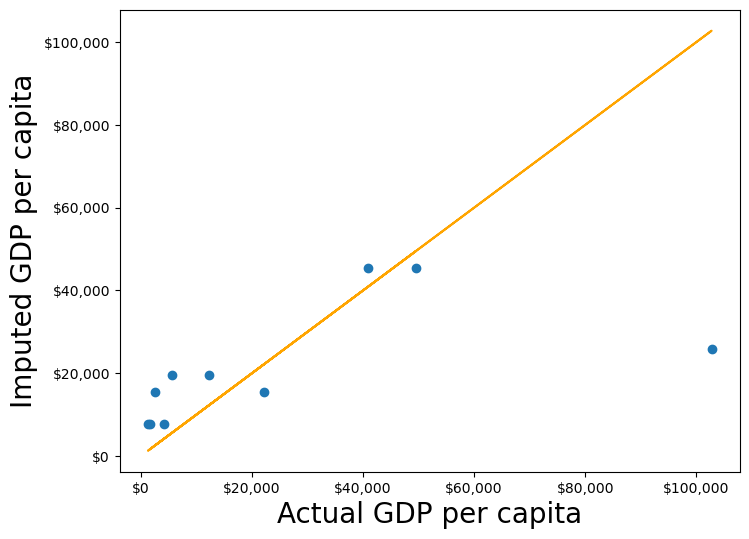

In [45]:
#Finding the mean GDP per capita of the continent
avg_gdpPerCapita = gdp_missing_data['gdpPerCapita'].groupby(gdp_missing_data['continent']).mean()

#Creating a copy of missing data to impute missing values
gdp_imputed_data = gdp_missing_data.copy()

#Replacing missing GDP per capita with the mean GDP per capita for the corresponding continent
for cont in avg_gdpPerCapita.index:
    gdp_imputed_data.loc[(gdp_imputed_data.continent==cont) & (gdp_imputed_data.gdpPerCapita.isnull()),
                     'gdpPerCapita']=avg_gdpPerCapita[cont]
plot_actual_vs_predicted()

**Approach 2:** Using the `groupby()` and `transform()` methods.

The `transform()` function is a powerful tool for filling missing values in grouped data. It allows us to apply a function across each group and align the result back to the original DataFrame, making it perfect for filling missing values based on group statistics.

In this example, we use `transform()` to impute missing values in the `gdpPerCapita` column by filling them with the mean `gdpPerCapita` of each continent:


RMSE= 25473.20645170116


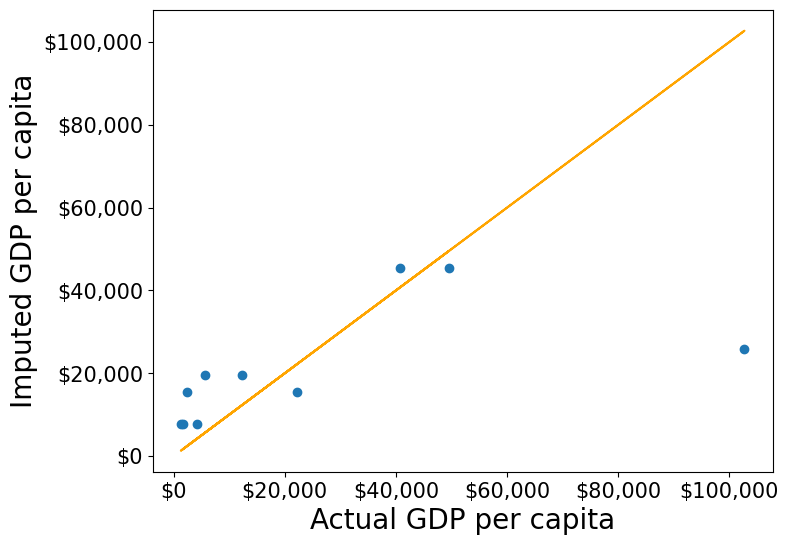

In [46]:
#Creating a copy of missing data to impute missing values
gdp_imputed_data = gdp_missing_data.copy()

#Grouping data by continent
grouped = gdp_missing_data.groupby('continent')

#Imputing missing values with the mean GDP per capita of the continent
gdp_imputed_data['gdpPerCapita'] = grouped['gdpPerCapita'].transform(lambda x: x.fillna(x.mean()))

plot_actual_vs_predicted()

Using the `transform()` function, missing values in gdpPerCapita for each group are filled with the group’s mean `gdpPerCapita`. This approach is not only more convenient to write but also faster compared to using for loops. While a for loop imputes missing values one group at a time, `transform()` performs built-in operations (like mean, sum, etc.) in a way that is optimized internally, making it more efficient.

Let's use `apply()` instead of `transform()` with `groupby()`

In [47]:
#Creating a copy of missing data to impute missing values
gdp_imputed_data = gdp_missing_data.copy()

#Grouping data by continent
grouped = gdp_missing_data.groupby('continent')

#Applying the lambda function on the 'gdpPerCapita' column of the groups
gdp_imputed_data['gdpPerCapita'] = grouped['gdpPerCapita'].apply(lambda x: x.fillna(x.mean()))

plot_actual_vs_predicted()

TypeError: incompatible index of inserted column with frame index

Why we ran into this error? and `apply()` doesn't work?

Here’s a deeper look at why `apply()` doesn’t work as expected here:

####  Behavior of `groupby().apply()` vs. `groupby().transform()`

- **`groupby().apply()`**: This method applies a function to each group and returns the result with a hierarchical (multi-level) index by default. This hierarchical index can make it difficult to align the result back to a single column in the original DataFrame.
  
- **`groupby().transform()`**: In contrast, `transform()` is specifically designed to apply a function to each group and return a Series that is aligned with the original DataFrame’s index. This alignment makes it directly compatible for assignment to a new or existing column in the original DataFrame.

####  Why `transform()` Works for Imputation

When using `transform()` to fill missing values, it applies the function (e.g., `fillna(x.mean())`) based on each group’s statistics, such as the mean, while keeping the result aligned with the original DataFrame’s index. This allows for smooth assignment to a column in the DataFrame without any index mismatch issues.

Additionally, `transform()` applies the function to each element in a group independently and returns a result that has the same shape as the original data, making it ideal for adding or modifying columns.


### Using [`filter()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.filter.html) on Groups

The `filter()` function filters entire groups based on a condition. It evaluates each group and keeps only those that meet the specified criteria.

Example: Keep only the countries where the mean life expectancy is greater than 70

In [48]:
# keep only the continent where the mean life expectancy is greater than 74
gdp_lifeExp_data.groupby('continent').filter(lambda x: x['lifeExp'].mean() > 74)['continent'].unique()

array(['Oceania'], dtype=object)

In [49]:
# keep only the country where the mean life expectancy is greater than 74
gdp_lifeExp_data.groupby('country').filter(lambda x: x['lifeExp'].mean() > 74)['country'].unique()

array(['Australia', 'Canada', 'Denmark', 'France', 'Iceland', 'Italy',
       'Japan', 'Netherlands', 'Norway', 'Spain', 'Sweden', 'Switzerland'],
      dtype=object)

Using `.nunique()` get the number of countries that satisfy this condition

In [50]:
gdp_lifeExp_data.groupby('country').filter(lambda x: x['lifeExp'].mean() > 74)['country'].nunique()

12

## Sampling data by group

If a dataset contains a large number of observations, operating on it can be computationally expensive. Instead, working on a sample of entire observations is a more efficient alterative.
The `groupby()` method combined with `apply()` can be used for stratified random sampling from a large dataset.

Before taking the random sample, let us find the number of countries in each continent.

In [59]:
gdp_lifeExp_data.continent.value_counts()

continent
Africa      624
Asia        396
Europe      360
Americas    300
Oceania      24
Name: count, dtype: int64

Let us take a random sample of 650 observations from the entire dataset.

In [52]:
sample_lifeExp_data = gdp_lifeExp_data.sample(650)

Now, let us see the number of countries of each continent in our sample.

In [53]:
sample_lifeExp_data.continent.value_counts()

continent
Africa      241
Asia        149
Europe      142
Americas    109
Oceania       9
Name: count, dtype: int64

Some of the continent have a very low representation in the data. To rectify this, we can take a random sample of 130 observations from each of the 5 continents. In other words, we can take a random sample from each of the continent-based groups.

In [75]:
evenly_sampled_lifeExp_data = gdp_lifeExp_data.groupby('continent').apply(lambda x:x.sample(130, replace=True), include_groups=False)

group_sizes = evenly_sampled_lifeExp_data.groupby(level=0).size()
print(group_sizes)

continent
Africa      130
Americas    130
Asia        130
Europe      130
Oceania     130
dtype: int64


The above stratified random sample equally represents all the continent.

## [`corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.corr.html): Correlation by group

The [`corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) method of the *GroupBy* object returns the correlation between all pairs of columns within each group.

**Example:** Find the correlation between `lifeExp` and `gdpPercap` for each continent-country level combination.

In [80]:
gdp_lifeExp_data.groupby(['continent','country']).apply(lambda x:x['lifeExp'].corr(x['gdpPercap']), include_groups=False)

continent  country       
Africa     Algeria           0.904471
           Angola           -0.301079
           Benin             0.843949
           Botswana          0.005597
           Burkina Faso      0.881677
                               ...   
Europe     Switzerland       0.980715
           Turkey            0.954455
           United Kingdom    0.989893
Oceania    Australia         0.986446
           New Zealand       0.974493
Length: 142, dtype: float64

Life expectancy is closely associated with GDP per capita across most continent-country combinations.

## [`pivot_table()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)

The `pivot_table()` function in pandas is a powerful tool for performing groupwise aggregation in a structured format, similar to Excel's pivot tables. It allows you to create a summary of data by grouping and aggregating it based on specified columns. Here’s an overview of how `pivot_table()` works for groupwise aggregation:

Note that `pivot_table()` is the same as `pivot()` except that `pivot_table()` aggregates the data as well in addition to re-arranging it.



**Example:** Consider the life expectancy dataset, calculate the average life expectancy for each country and year combination

In [81]:
pd.pivot_table(data = gdp_lifeExp_data, values = 'lifeExp',index = 'country', columns ='year',aggfunc = 'mean',margins = True)

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007,All
country,,,,,,,,,,,,,
Afghanistan,28.80100,30.332000,31.997000,34.02000,36.088000,38.438000,39.854000,40.822000,41.674000,41.763000,42.129000,43.828000,37.478833
Albania,55.23000,59.280000,64.820000,66.22000,67.690000,68.930000,70.420000,72.000000,71.581000,72.950000,75.651000,76.423000,68.432917
Algeria,43.07700,45.685000,48.303000,51.40700,54.518000,58.014000,61.368000,65.799000,67.744000,69.152000,70.994000,72.301000,59.030167
Angola,30.01500,31.999000,34.000000,35.98500,37.928000,39.483000,39.942000,39.906000,40.647000,40.963000,41.003000,42.731000,37.883500
Argentina,62.48500,64.399000,65.142000,65.63400,67.065000,68.481000,69.942000,70.774000,71.868000,73.275000,74.340000,75.320000,69.060417
...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,43.16000,45.671000,48.127000,51.63100,56.532000,60.765000,64.406000,67.046000,69.718000,71.096000,72.370000,73.422000,60.328667
"Yemen, Rep.",32.54800,33.970000,35.180000,36.98400,39.848000,44.175000,49.113000,52.922000,55.599000,58.020000,60.308000,62.698000,46.780417
Zambia,42.03800,44.077000,46.023000,47.76800,50.107000,51.386000,51.821000,50.821000,46.100000,40.238000,39.193000,42.384000,45.996333


**Explanation**

- **values**: Specifies the column to aggregate (e.g., `lifeExp` in our example).
- **index**: Groups by the rows based on the `country` column.
- **columns**: Groups by the columns based on the `year` column.
- **aggfunc**: Uses `mean` to calculate the average life expectancy.

**Common Aggregation Functions in `pivot_table()`**

You can use various aggregation functions within `pivot_table()` to summarize data:

- **`mean`** – Calculates the average of values within each group.
- **`sum`** – Computes the total of values within each group.
- **`count`** – Counts the number of non-null entries within each group.
- **`min`** and **`max`** – Finds the minimum and maximum values within each group.


We can also use custom *GroupBy* aggregate functions with `pivot_table()`.

**Example**: Find the $90^{th}$ percentile of life expectancy for each country and year combination

In [82]:
pd.pivot_table(data = gdp_lifeExp_data, values = 'lifeExp',index = 'country', columns ='year',aggfunc = lambda x:np.percentile(x,90))

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Afghanistan,28.801,30.332,31.997,34.020,36.088,38.438,39.854,40.822,41.674,41.763,42.129,43.828
Albania,55.230,59.280,64.820,66.220,67.690,68.930,70.420,72.000,71.581,72.950,75.651,76.423
Algeria,43.077,45.685,48.303,51.407,54.518,58.014,61.368,65.799,67.744,69.152,70.994,72.301
Angola,30.015,31.999,34.000,35.985,37.928,39.483,39.942,39.906,40.647,40.963,41.003,42.731
Argentina,62.485,64.399,65.142,65.634,67.065,68.481,69.942,70.774,71.868,73.275,74.340,75.320
...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,40.412,42.887,45.363,47.838,50.254,55.764,58.816,62.820,67.662,70.672,73.017,74.249
West Bank and Gaza,43.160,45.671,48.127,51.631,56.532,60.765,64.406,67.046,69.718,71.096,72.370,73.422
"Yemen, Rep.",32.548,33.970,35.180,36.984,39.848,44.175,49.113,52.922,55.599,58.020,60.308,62.698


## [`crosstab()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)

### Basic Usage of `crosstab()`

The `crosstab()` method is a special case of a pivot table for computing group frequncies (or size of each group).

In [60]:
# create a basic crosstab to see counts of countries in each continent
pd.crosstab(gdp_lifeExp_data['continent'], columns='count')


col_0,count
continent,
Africa,624
Americas,300
Asia,396
Europe,360
Oceania,24


Use the `margins=True` argument to add totals (row and column margins) to the table. The `All` row and column provide totals for each age group and gender category.

In [61]:
# create a crosstab to see counts of countries in each continent and year
pd.crosstab(gdp_lifeExp_data['continent'], gdp_lifeExp_data['year'], margins=True)

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007,All
continent,,,,,,,,,,,,,
Africa,52,52,52,52,52,52,52,52,52,52,52,52,624
Americas,25,25,25,25,25,25,25,25,25,25,25,25,300
Asia,33,33,33,33,33,33,33,33,33,33,33,33,396
Europe,30,30,30,30,30,30,30,30,30,30,30,30,360
Oceania,2,2,2,2,2,2,2,2,2,2,2,2,24
All,142,142,142,142,142,142,142,142,142,142,142,142,1704


This table shows the count of each year in each continent group, helping us understand the year distribution across different continent groups.  We may often use it to check if the data is representative of all groups that are of interest to us.

### Using `crosstab()` with Aggregation Functions

You can specify a `values` column and an aggregation function (`aggfunc`) to summarize numerical data for each combination of categorical variables.

**Example:** find the mean life expectancy for  each continent and year

In [62]:
# find the mean life expectancy for each country in each continent and year
pd.crosstab(gdp_lifeExp_data['continent'], gdp_lifeExp_data['year'], values=gdp_lifeExp_data['lifeExp'], aggfunc='mean')

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
continent,,,,,,,,,,,,
Africa,39.135500,41.266346,43.319442,45.334538,47.450942,49.580423,51.592865,53.344788,53.629577,53.598269,53.325231,54.806038
Americas,53.279840,55.960280,58.398760,60.410920,62.394920,64.391560,66.228840,68.090720,69.568360,71.150480,72.422040,73.608120
Asia,46.314394,49.318544,51.563223,54.663640,57.319269,59.610556,62.617939,64.851182,66.537212,68.020515,69.233879,70.728485
Europe,64.408500,66.703067,68.539233,69.737600,70.775033,71.937767,72.806400,73.642167,74.440100,75.505167,76.700600,77.648600
Oceania,69.255000,70.295000,71.085000,71.310000,71.910000,72.855000,74.290000,75.320000,76.945000,78.190000,79.740000,80.719500


## Independent Study

### Practice exercise 1

Read the table consisting of GDP per capita of countries from the webpage: https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita . 

To only read the relevant table, read the tables that contain the word *'Country'*. 

Estimate the GDP per capita of each country as the average of the estimates of the three agencies - IMF, United Nations and World Bank.

We need to do a bit of data cleaning before we could directly use the `groupby()` function. Follow the steps below:


1. Drop the "Year" column
2. Drop the level 1 column name (innermost level column)
3. Apply the following function on all the columns of the "Estimate" to convert them to numeric: `f = lambda x:pd.to_numeric(x,errors = 'coerce')`
4. Set the Country/Territory column as the index
5. Convert all other columns into numeric and coerce errors using 'errors='coerce'`
6. Drop rows with NaN values
7. Find the average GDP per capital across the three agencies

In [94]:
dfs = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita', match = 'Country')
gdp_data  = dfs[0]
gdp_data.head()

Country/Territory IMF[4][5]       World Bank[6]       United Nations[7]  \
  Country/Territory  Estimate  Year      Estimate  Year          Estimate   
0            Monaco         —     —        240862  2022            240535   
1     Liechtenstein         —     —        187267  2022            197268   
2        Luxembourg    135321  2024        128259  2023            125897   
3           Bermuda         —     —        123091  2022            117568   
4       Switzerland    106098  2024         99995  2023             93636   

         
   Year  
0  2022  
1  2022  
2  2022  
3  2022  
4  2022

In [106]:
# Flatten the MultiIndex to access column names
gdp_data.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in gdp_data.columns]

# Drop all columns containing "Year"
gdp_data = gdp_data.loc[:, ~gdp_data.columns.str.contains('Year', case=False)]

gdp_data = gdp_data.rename(columns={"Country/Territory Country/Territory": "Country/Territory"})

gdp_data.head()

,Country/Territory,IMF,World Bank,United Nations
0,Monaco,—,240862,240535
1,Liechtenstein,—,187267,197268
2,Luxembourg,135321,128259,125897
3,Bermuda,—,123091,117568
4,Switzerland,106098,99995,93636


In [107]:
import re
column_name_cleaner = lambda x:re.split(r'\[', x)[0]

gdp_data.columns = gdp_data.columns.map(column_name_cleaner)
gdp_data.head()

,Country/Territory,IMF,World Bank,United Nations
0,Monaco,—,240862,240535
1,Liechtenstein,—,187267,197268
2,Luxembourg,135321,128259,125897
3,Bermuda,—,123091,117568
4,Switzerland,106098,99995,93636


In [108]:
# set the country column as the index
gdp_data.set_index('Country/Territory', inplace=True)

# convert all other columns into numeric and coerce errors
gdp_data = gdp_data.apply(pd.to_numeric, errors='coerce')

# drop rows with NaN values
gdp_data.dropna(inplace=True)

#find the average GDP per capita
gdp_data['Average GDP per capita'] = gdp_data.mean(axis=1)
gdp_data.head()

,IMF,World Bank,United Nations,Average GDP per capita
Country/Territory,,,,
Luxembourg,135321.0,128259.0,125897.0,129825.666667
Switzerland,106098.0,99995.0,93636.0,99909.666667
Ireland,103500.0,103685.0,105993.0,104392.666667
Norway,90434.0,87962.0,106623.0,95006.333333
Singapore,89370.0,84734.0,78115.0,84073.000000


### Practice exercise 2

Read the spotify dataset from `spotify_data.csv` that contains information about tracks and artists

####
Find the mean and standard deviation of the track popularity for each genre.

####
Create a new categorical column, `energy_lvl`, with two levels – 'Low energy' and 'High energy' – using equal-sized bins based on the track’s energy level. Then, calculate the mean, standard deviation, and 90th percentile of track popularity for each genre and energy level combination

####
Find the mean and standard deviation of track popularity and danceability for each genre and energy level. What insights you can gain from the generated table

####
For each genre and energy level, find the mean and standard deviation of the track popularity, and the minimum and maximum values of loudness.

####
Find the most popular artist from each genre.

####
Filter the first 4 columns of the spotify dataset. Drop duplicate observartions in the resulting dataset using the Pandas DataFrame method [`drop_duplicates()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html). Find the top 3 most popular artists for each genre.

####
The spotify dataset has more than 200k observations. It may be expensive to operate with so many observations. Take a random sample of 650 observations to analyze spotify data, such that all genres are equally represented.

####
Find the correlation between `danceability` and `track popularity` for each genre-energy level combination.


####

Find the mean of track popularity for each genre-energy lvl combination such that each row corresponds to a genre, and the energy levels correspond to columns.

Hints: using `pivot_table()`

####

Find the $90^{th}$ percentile of track popularity for each genre-energy lvl combination such that each row corresponds to a genre, and the energy levels correspond to columns.

Hints: using `pivot_table()`

####
Find the number of observations in each group, where each groups corresponds to a distinct genre-energy lvl combination

####
Find the percentage of observations in each group of the above table.

####
What percentage of unique tracks are contributed by the top 5 artists of each genre?

**Hint:** Find the top 5 artists based on `artist_popularity` for each genre. Count the total number of unique tracks (`track_name`) contributed by these artists. Divide this number by the total number of unique tracks in the data. The `nunique()` function will be useful.